# Kwanza Tukule Data Analyst Assessment

In [1]:
# Libraries to be used
import numpy as np # for mathematical calculations
import pandas as pd # for data manipulation
import seaborn as sns # for graph plot
import matplotlib.pyplot as plt # for drawing graphs

## Section 1: Data Cleaning and Preparation (20 points)

##### Loading and Viewing the dataset

In [2]:
# Loading the dataset
sales = pd.read_csv("Case Study Data.csv")

# viewing the first few rows of the dataset
sales.head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


## Data Quality Assessment

### Missing Values

##### Checking for missing values and handling them

In [3]:
# Let's check the dimensions of the dataset
sales.shape

# Let's also check on the dataset description
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [4]:
# Lets look for columns with missing values
sales.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [5]:
# Dropping rows with missing values
sales = sales.dropna()

# We can check if there are still any missing values
sales.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

### Incosistent Datatypes and Values

In [6]:
## Let's also check on the dataset description
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333397 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333397 non-null  object
 1   ANONYMIZED CATEGORY  333397 non-null  object
 2   ANONYMIZED PRODUCT   333397 non-null  object
 3   ANONYMIZED BUSINESS  333397 non-null  object
 4   ANONYMIZED LOCATION  333397 non-null  object
 5   QUANTITY             333397 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 20.3+ MB


In [7]:
# Lets convert the Unit Price into its correct datatype int
sales["UNIT PRICE"]= sales["UNIT PRICE"].str.replace(",","", regex = False).astype(int)

In [8]:
sales["DATE"] = pd.to_datetime(sales['DATE'], format="%B %d, %Y, %I:%M %p")

In [9]:
# Let's check if there are values that don't add up in the quantity and unit price columns
# Let's sort the data frame by sales in ascending order
sales.sort_values(by ="UNIT PRICE").head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
211820,2024-07-21 16:43:00,Category-100,Product-9393,Business-adc7,Location-1ba8,4,0
296729,2024-07-11 16:40:00,Category-100,Product-6f02,Business-2672,Location-b27b,1,0
208412,2024-02-27 09:00:00,Category-105,Product-fd84,Business-3326,Location-f37d,1,0
111713,2024-02-05 14:53:00,Category-105,Product-fd84,Business-1548,Location-f37d,12,0
231035,2024-01-24 18:57:00,Category-113,Product-cd8e,Business-0d61,Location-1ba8,2,0


In [10]:
# Checking how many rows have the Zero's
sales[sales['UNIT PRICE'] == 0].count()

DATE                   25
ANONYMIZED CATEGORY    25
ANONYMIZED PRODUCT     25
ANONYMIZED BUSINESS    25
ANONYMIZED LOCATION    25
QUANTITY               25
UNIT PRICE             25
dtype: int64

In [11]:
# Dropping values with a Unit Price of 0
sales = sales.drop(sales[sales["UNIT PRICE"] == 0].index)

# Checking if the rows were dropped
sales[sales['UNIT PRICE'] == 0].count()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

In [12]:
# We can also check for the quantity
sales[sales["QUANTITY"] == 0].head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
19828,2024-12-20 21:07:00,Category-113,Product-6342,Business-4305,Location-3e32,0,2
48930,2024-06-02 10:18:00,Category-75,Product-4832,Business-195b,Location-c86b,0,3880
48931,2024-06-02 10:18:00,Category-75,Product-6aa1,Business-195b,Location-c86b,0,1960
48932,2024-06-02 10:18:00,Category-100,Product-f3ee,Business-195b,Location-c86b,0,2045
60118,2024-06-14 11:11:00,Category-120,Product-14f3,Business-1b8b,Location-c2f2,0,1850


In [13]:
# Lets get a count of how many they are in the dataset
sales[sales["QUANTITY"] == 0].count()

DATE                   39
ANONYMIZED CATEGORY    39
ANONYMIZED PRODUCT     39
ANONYMIZED BUSINESS    39
ANONYMIZED LOCATION    39
QUANTITY               39
UNIT PRICE             39
dtype: int64

In [14]:
# Dropping the rows with Zero's
sales= sales.drop(sales[sales['QUANTITY']== 0].index)

#Checking if they have been dropped
sales[sales['QUANTITY']==0].count()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

### Summary

## Feature Engineering

In [15]:
# Adding the Month Year Column
sales["Month-Year"] = sales["DATE"].dt.strftime("%B") + " " + sales["DATE"].dt.year.astype(str)

In [16]:
# Addint the Total Sales Column
sales["Total Sales"] = sales["QUANTITY"] * sales["UNIT PRICE"]

In [17]:
sales.head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,Total Sales
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,August 2024,850
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910,August 2024,3820
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670,August 2024,3670
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605,August 2024,2605
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480,August 2024,7400


## Section 2: Exploratory Data Analysis (30 points)

## Sales Overview:

##### By Anonymized Business

In [18]:
# Filtering the required columns from the dataset
grouped_sales_category = sales[['ANONYMIZED CATEGORY', 'QUANTITY', 'Total Sales']]

# Grouping the total sales and quantity by category
grouped_sales_category = grouped_sales_category.groupby("ANONYMIZED CATEGORY").sum()

# getting the top 10 sold category
grouped_sales_category_total_sales=grouped_sales_category.sort_values("Total Sales", ascending = False).head(10)

# getting the top 10 category with the highest total quantity
grouped_sales_category_quantity =grouped_sales_category.sort_values("QUANTITY", ascending = False).head(10)

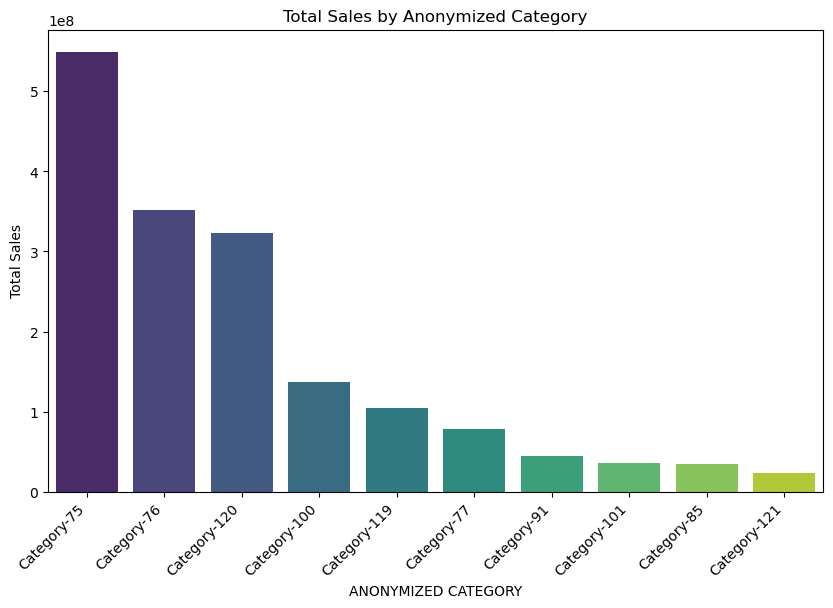

In [19]:
# Visualization of Total Sales by category
grouped_sales_category_total_sales = grouped_sales_category_total_sales[['Total Sales']]

# Plotting bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_sales_category_total_sales.index, y=grouped_sales_category_total_sales['Total Sales'],hue=grouped_sales_category_total_sales.index, palette='viridis', legend=False)
plt.title("Total Sales by Anonymized Category")
plt.xlabel("ANONYMIZED CATEGORY")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha = "right")
plt.show()

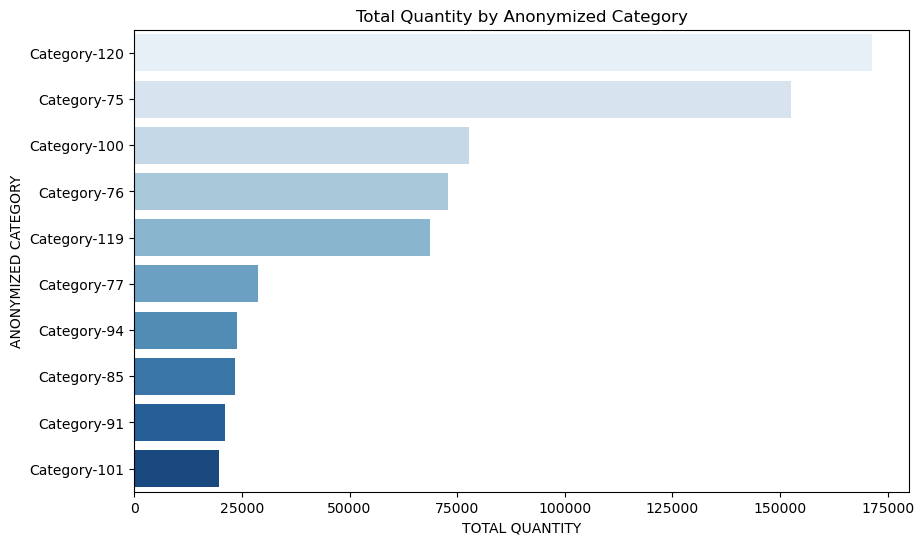

In [20]:
# Visualization of Total wuantity by category
grouped_sales_category_quantity = grouped_sales_category_quantity[['QUANTITY']]

# Plotting bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=grouped_sales_category_quantity.index, x=grouped_sales_category_quantity['QUANTITY'],hue=grouped_sales_category_quantity.index, palette='Blues', legend=False)
plt.title("Total Quantity by Anonymized Category")
plt.ylabel("ANONYMIZED CATEGORY")
plt.xlabel("TOTAL QUANTITY")
plt.xticks(rotation=0, ha = "center")
plt.show()

##### By Anonymized Business

In [21]:
# Filtering the required columns from the dataset
grouped_sales_category = sales[['ANONYMIZED BUSINESS', 'QUANTITY', 'Total Sales']]

# Grouping the total sales and quantity by Business
grouped_sales_category = grouped_sales_category.groupby("ANONYMIZED BUSINESS").sum()

# getting the top 10 sold category
grouped_sales_business_total_sales=grouped_sales_category.sort_values("Total Sales", ascending = False).head(10)

# getting the top 10 category with the highest total quantity
grouped_sales_business_quantity =grouped_sales_category.sort_values("QUANTITY", ascending = False).head(10)

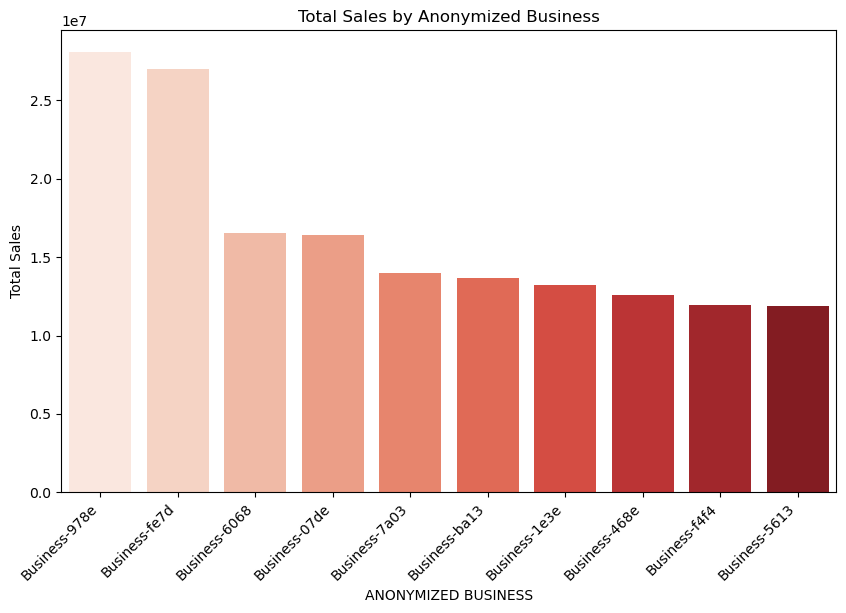

In [22]:
# Visualization of Total Sales by business
grouped_sales_business_total_sales = grouped_sales_business_total_sales[['Total Sales']]

# Plotting bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_sales_business_total_sales.index, y=grouped_sales_business_total_sales['Total Sales'],hue=grouped_sales_business_total_sales.index, palette="Reds", legend=False)
plt.title("Total Sales by Anonymized Business")
plt.xlabel("ANONYMIZED BUSINESS")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha = "right")
plt.show()

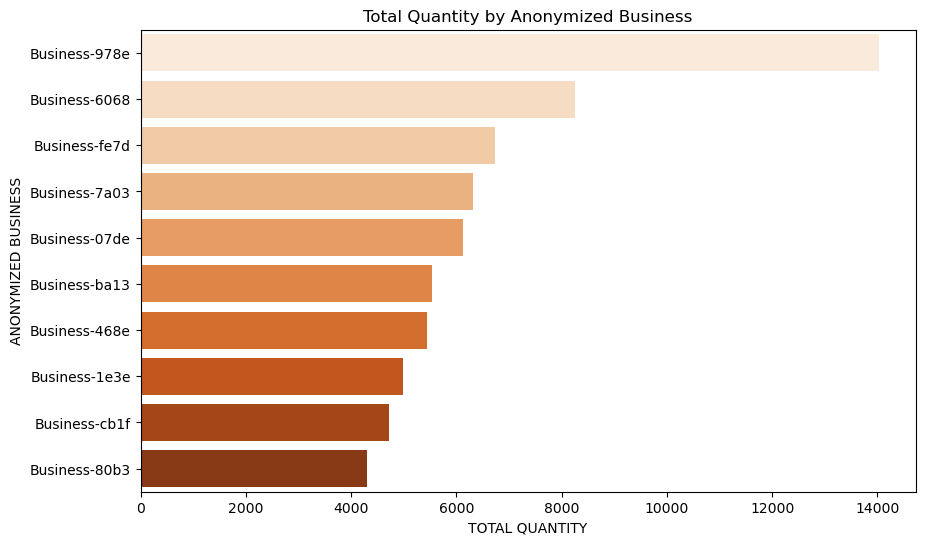

In [23]:
# Visualization of Total Quantity by business
grouped_sales_business_quantity = grouped_sales_business_quantity[['QUANTITY']]

# Plotting bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=grouped_sales_business_quantity.index, x=grouped_sales_business_quantity['QUANTITY'],hue=grouped_sales_business_quantity.index, palette='Oranges', legend=False)
plt.title("Total Quantity by Anonymized Business")
plt.ylabel("ANONYMIZED BUSINESS")
plt.xlabel("TOTAL QUANTITY")
plt.xticks(rotation=0, ha = "center")
plt.show()

## Trends Over Time

In [24]:
# Let's Filter the required columns
trend_sales =sales[["Month-Year", "QUANTITY", "Total Sales"]]

# Let's get the summary of total sales and quantity by Month-Year
trend_sales_month_year = trend_sales.groupby("Month-Year").sum()

# Let's reset the index so that we can easily sort the data frame
trend_sales_month_year = trend_sales_month_year.reset_index()

# Let's create a custom order to sort our values
custom_order = ["January 2024", "February 2024", "March 2024", "April 2024", "May 2024", "June 2024", "July 2024", "August 2024", "September 2024", "October 2024", "November 2024", "December 2024"]

# Let's convert the Month-Year to categorical with a custom order
trend_sales_month_year["Month-Year"] = pd.Categorical(trend_sales_month_year["Month-Year"], categories = custom_order, ordered = True)

# Let's sort the values in custom order
trend_sales_month_year = trend_sales_month_year.sort_values("Month-Year")

trend_sales_month_year.head(5)

,Month-Year,QUANTITY,Total Sales
4,January 2024,69899,191349182
3,February 2024,45386,130626309
7,March 2024,45981,117696757
0,April 2024,51049,123188281
8,May 2024,70212,170372397


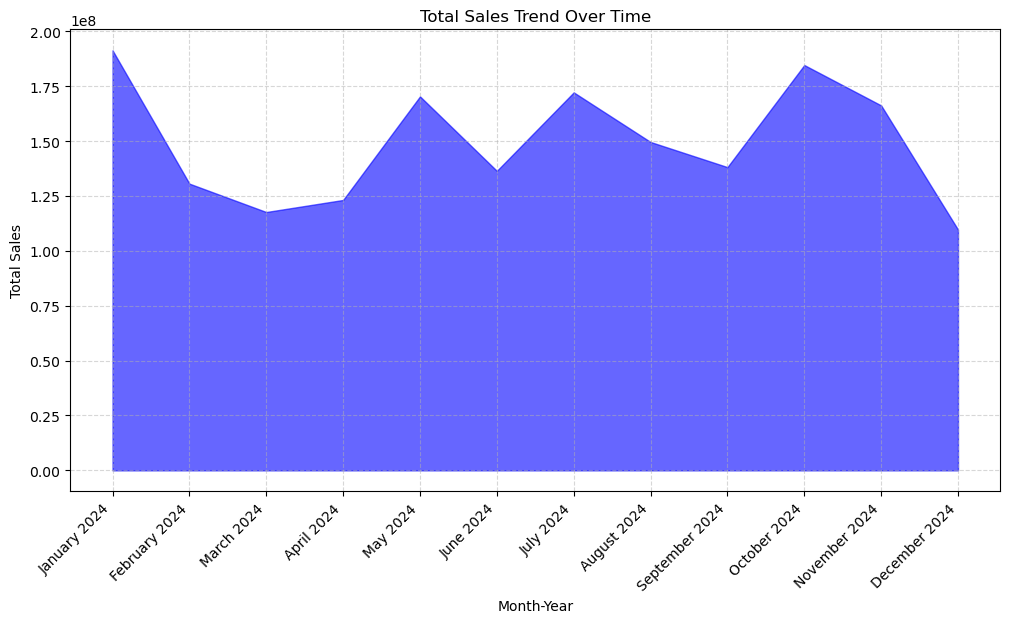

In [25]:
# Plotting area chart for Total Sales by Month-Year
plt.figure(figsize=(12, 6))

# Plot Total Sales
plt.fill_between(trend_sales_month_year["Month-Year"], trend_sales_month_year['Total Sales'], color='blue', alpha=0.6, label='Total Sales')

# Formatting the chart
plt.title("Total Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

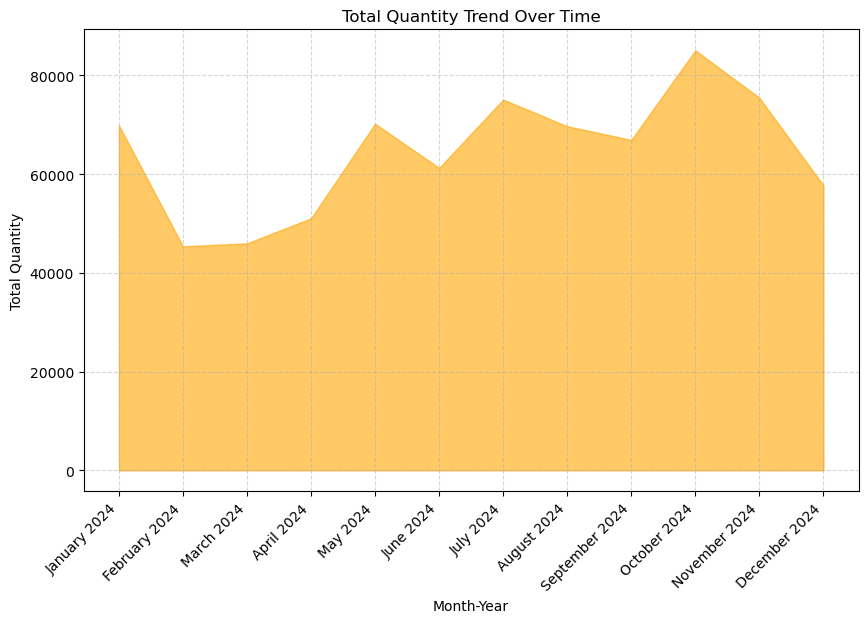

In [26]:
# Plotting area chart for Total Sales by Month-
plt.figure(figsize=(10, 6))

# Plot Quantity
plt.fill_between(trend_sales_month_year["Month-Year"], trend_sales_month_year['QUANTITY'], color='orange', alpha=0.6, label='Total Quantity')

# Formatting the chart
plt.title("Total Quantity Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

## Performance Analysis

#### Identify the top 5 most frequently purchased products (based on Quantity).

In [27]:
# Let's filter the sales dataset to get the columns we need
frequent_purchased = sales[["QUANTITY", "ANONYMIZED PRODUCT"]]

# Let's group the quantity by anonymized product
frequent_purchased =frequent_purchased.groupby("ANONYMIZED PRODUCT").sum().sort_values(by= "QUANTITY", ascending = False).head(5)

# Printing out the top 5 most frequently purchased products based on quantity
print("The Below table shows the top 5 most frequently purchased products based on quantity")
print(frequent_purchased)

The Below table shows the top 5 most frequently purchased products based on quantity
                    QUANTITY
ANONYMIZED PRODUCT          
Product-66e0           47170
Product-e805           43577
Product-8f75           38032
Product-29ee           36639
Product-4156           28704


#### Identify the top 5 most valuable products (based on Value).

In [28]:
# Let's filter the sales dataset to get the columns we need
valuable_products = sales[["ANONYMIZED PRODUCT", "Total Sales"]]

# Let's group the data by ANONYMIZED PRODUCT to get the top 5 valuable products
valuable_products =valuable_products.groupby("ANONYMIZED PRODUCT").sum().sort_values(by= "Total Sales", ascending= False).head(5)

# Printing out the top 5 most frequently purchased products based on quantity
print("The Below table shows the top 5 most frequently purchased products based on value")
print(valuable_products)

The Below table shows the top 5 most frequently purchased products based on value
                    Total Sales
ANONYMIZED PRODUCT             
Product-e805          268760281
Product-8f75          160773305
Product-66e0           71038955
Product-29ee           69722392
Product-4156           57413221


## Section 3: Advanced Analysis (30 points)

## Customer Segmentation:

In [29]:
# Filtering from the sales dataset to get the columns we need
Anonymized_Business_summary = sales[["QUANTITY", "ANONYMIZED BUSINESS", "Total Sales"]]

# getting a summary of Quantity and Total Sales by Anonymized Business
Anonymized_Business_summary = Anonymized_Business_summary.groupby("ANONYMIZED BUSINESS").sum()

# reseting the index
Anonymized_Business_summary = Anonymized_Business_summary.reset_index()

# Getting the business frequency
Anonymized_Business_frequency = sales["ANONYMIZED BUSINESS"].value_counts()

# reseting the index
Anonymized_Business_frequency =Anonymized_Business_frequency.reset_index()

# Merging the two to have one summary dataset
Anonymized_Business_summary_merged= pd.merge(Anonymized_Business_summary, Anonymized_Business_frequency, on = "ANONYMIZED BUSINESS")

# Printing the First few rows
Anonymized_Business_summary_merged.head(5)

,ANONYMIZED BUSINESS,QUANTITY,Total Sales,count
0,Business-0000,8,10445,8
1,Business-0005,1,2645,1
2,Business-0029,26,77340,6
3,Business-003d,98,221761,31
4,Business-0072,127,225056,101


#### Clustering


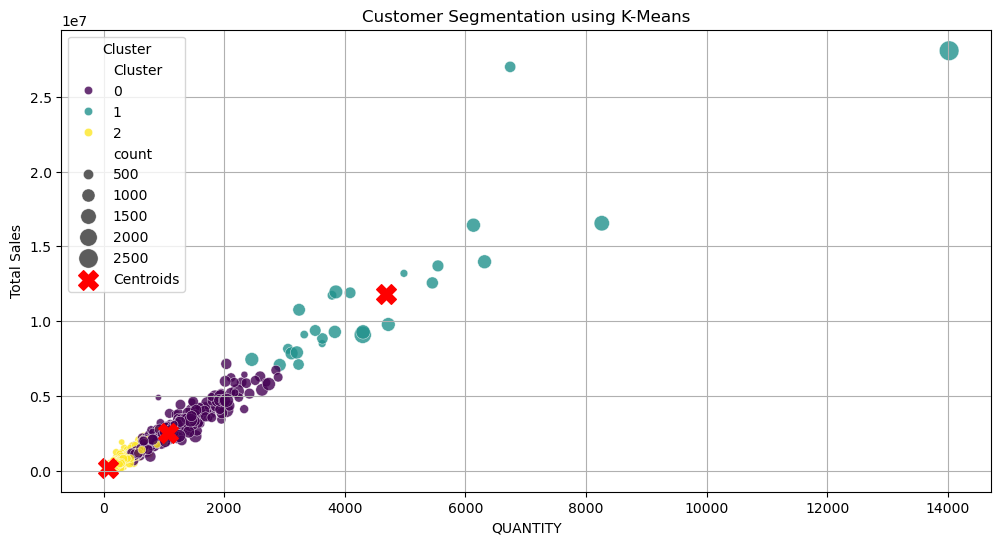

In [30]:
# Let's import the libraries needed for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Obtaining the columns to be used for clustering
x = Anonymized_Business_summary_merged[["QUANTITY", "Total Sales", "count"]]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Applying the K means clustering technique
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
Anonymized_Business_summary_merged['Cluster'] = kmeans.fit_predict(X_scaled)

# Let's visulaize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Anonymized_Business_summary_merged["QUANTITY"], y=Anonymized_Business_summary_merged['Total Sales'],size =Anonymized_Business_summary_merged["count"], hue=Anonymized_Business_summary_merged['Cluster'], palette='viridis', sizes=(20,200), alpha=0.8)
# Plotting cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('QUANTITY')
plt.ylabel('Total Sales')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [31]:
# Print cluster centers
print("Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)

Cluster Centers (Standardized):
[[ 1.87982205  1.83705341  2.57411088]
 [ 9.3546554   9.64774943  5.68496319]
 [-0.18877765 -0.18743535 -0.21691948]]


In [32]:
# Classifying the different Clusters
Anonymized_Business_summary_merged["Classified"] = Anonymized_Business_summary_merged["Cluster"].replace({2:"High Value", 1:"Medium Value", 0:"Low Value"})

# Saving the file in excel format to be used in dashboard classification visualization
output_file = "Classified_summary.csv"
Anonymized_Business_summary_merged.to_csv(output_file, index=False)

# Viewing a few
Anonymized_Business_summary_merged.head(5)

,ANONYMIZED BUSINESS,QUANTITY,Total Sales,count,Cluster,Classified
0,Business-0000,8,10445,8,2,High Value
1,Business-0005,1,2645,1,2,High Value
2,Business-0029,26,77340,6,2,High Value
3,Business-003d,98,221761,31,2,High Value
4,Business-0072,127,225056,101,2,High Value


 ##### Engagement Recommendations:

- High Value: Personalized promotions, loyalty programs, priority support.
- Medium Value: Targeted discounts, upselling opportunities.
- Low Value: Increase engagement through awareness campaigns.

## Forecasting

In [33]:
# Resampling the data
sales['DATE'] = pd.to_datetime(sales['DATE'])
sales_monthly = sales.resample('ME', on='DATE')['Total Sales'].sum()

ADF Statistic: -2.775307934246428
p-value: 0.06188833519166179
Data is non-stationary, applying differencing...


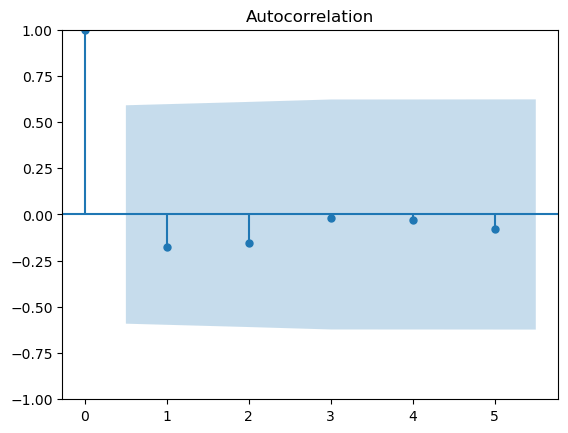

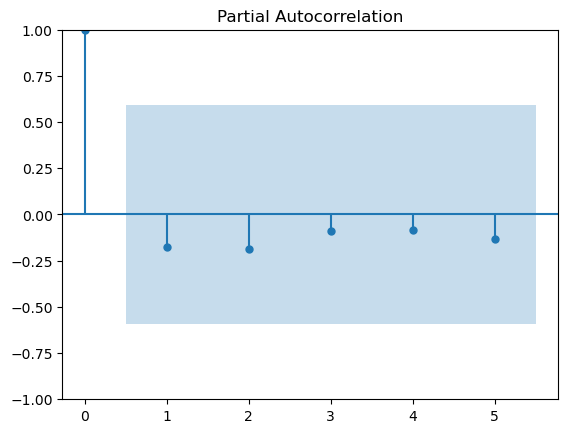

2025-01-31   -3.703487e+07
2025-02-28   -4.701752e+07
2025-03-31   -4.191211e+07
Freq: ME, Name: predicted_mean, dtype: float64


In [34]:
# importing the library to use
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(sales_monthly)

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If p-value > 0.05, data is non-stationary and differencing is needed
if adf_test[1] > 0.05:
    print("Data is non-stationary, applying differencing...")
    sales_monthly = sales_monthly.diff().dropna()

# Plot ACF and PACF to determine p and q
plot_acf(sales_monthly)
plot_pacf(sales_monthly)
plt.show()

# building a forecast using arima
model = ARIMA(sales_monthly, order=(1,1,0))  # Adjusting p, d, q as needed
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)  # Predict next 3 months

print(forecast)


## Anomaly Detection

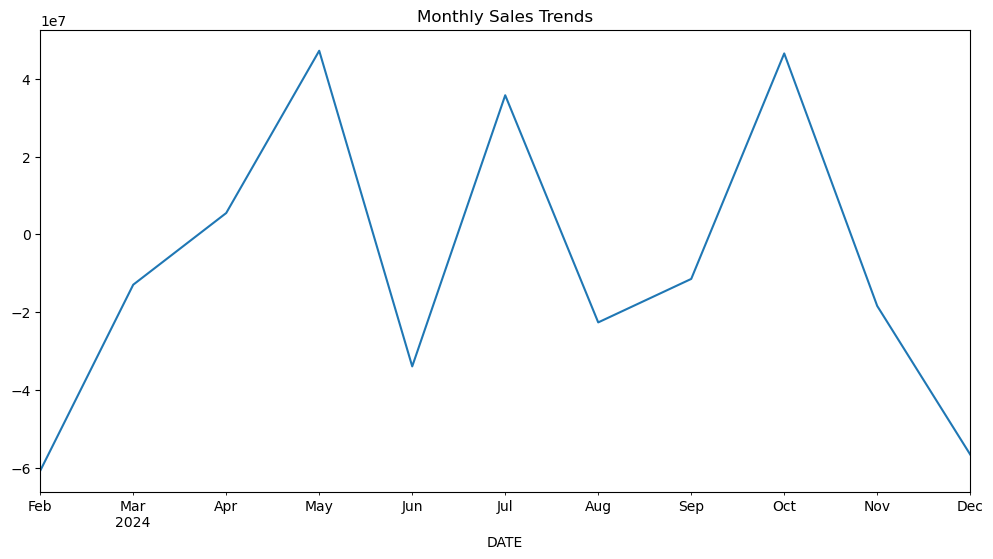

In [35]:
# Plotting a sales trend to detect irregularities
sales_monthly.plot(figsize=(12,6), title="Monthly Sales Trends")
plt.show()

In [36]:
# use of a Z-score to detect anomalies
from scipy.stats import zscore

#converting sales_monthly to a dataframe
sales_monthly = sales_monthly.to_frame()

# Compute Z-score correctly and assign it back with aligned index
sales_monthly['Z-score'] = zscore(sales_monthly['Total Sales']) 

# Identify anomalies where Z-score > 2 or < -2
anomalies = sales_monthly[sales_monthly['Z-score'].abs() > 2]

print(anomalies)

Empty DataFrame
Columns: [Total Sales, Z-score]
Index: []


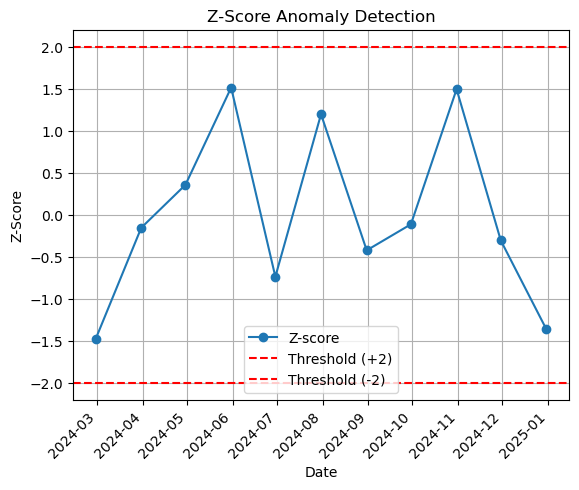

In [37]:
# A visualization to check if any value in the total sales lies outside the range
plt.plot(sales_monthly.index, sales_monthly['Z-score'], marker='o', label='Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Threshold (+2)')
plt.axhline(y=-2, color='r', linestyle='--', label='Threshold (-2)')
plt.title('Z-Score Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.xticks(rotation = 45, ha = "right")
plt.legend()
plt.grid()
plt.show()

## Correlation Analysis:

In [38]:
# Getting the correlation coefficient
correlation = sales['QUANTITY'].corr(sales['Total Sales'])
print(f"Correlation: {correlation}")

Correlation: 0.8351722755982364


<Axes: xlabel='QUANTITY', ylabel='Total Sales'>

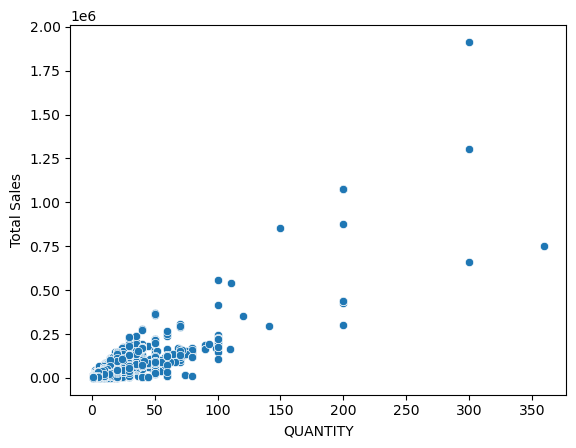

In [39]:
# A scatter plot visualization to explore the relationship
sns.scatterplot(x=sales['QUANTITY'], y=sales['Total Sales'])

##### Provide insights into which factors drive sales performance.
- The Total Sales is directly proportional to the Quantity such that the higher the quantity sold the higher the sales
- When a customer buys a high number of products it increases the amount of value of the sales

## Section 4: Strategic Insights and Recommendations (20 points)

#### Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.
- The best category to prioritize for marketing campaigns is **Category 75** since it has the highest Total Sales and falls second depending on the highest quantity sold

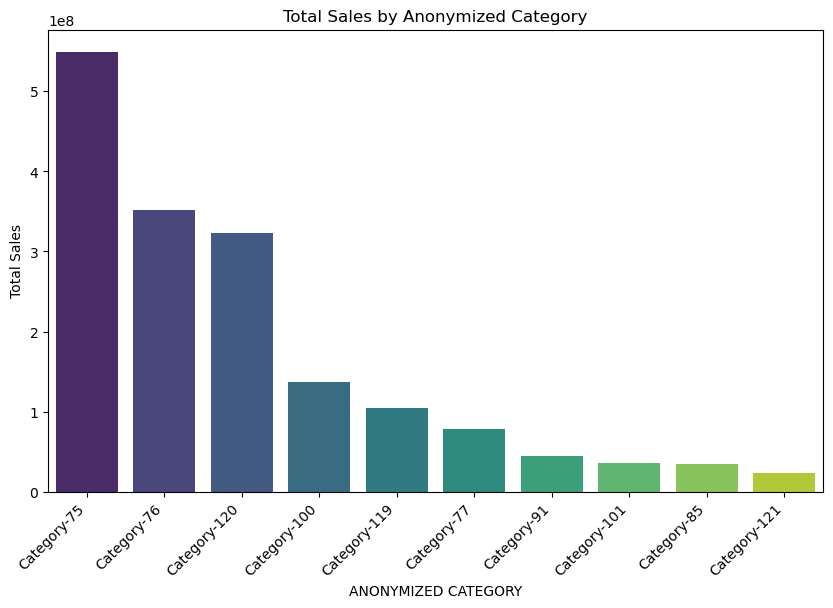

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_sales_category_total_sales.index, y=grouped_sales_category_total_sales['Total Sales'],hue=grouped_sales_category_total_sales.index, palette='viridis', legend=False)
plt.title("Total Sales by Anonymized Category")
plt.xlabel("ANONYMIZED CATEGORY")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha = "right")
plt.show()

#### Customer Retention: Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.

In [41]:
# extracting the columns I need from the sales dataset
business_purchase_frequency = sales[["Month-Year", "ANONYMIZED BUSINESS"]]

# Count purchases per business per month
purchase_frequency = sales.groupby(['ANONYMIZED BUSINESS', 'Month-Year']).size().reset_index(name='PurchaseCount')

# Pivot to visualize trends
pivot_table = purchase_frequency.pivot(index='Month-Year', columns='ANONYMIZED BUSINESS', values='PurchaseCount').fillna(0)

# Calculateing the month-to-month difference for each business
pivot_diff = pivot_table.diff().fillna(0)  # Filling NaN (first row) with 0

# Suming up the total decline for each business (negative values only)
business_decline = pivot_diff[pivot_diff < 0].sum()

# Sorting the businesses by the highest negative decline and extracting the top 10
top_declining_businesses = business_decline.sort_values().head(10)  

print("Businesses with reduced purchase frequency over time:")
print(top_declining_businesses)

Businesses with reduced purchase frequency over time:
ANONYMIZED BUSINESS
Business-978e   -581.0
Business-6baf   -412.0
Business-1ddc   -391.0
Business-6011   -349.0
Business-d72e   -323.0
Business-8c9c   -322.0
Business-cf0d   -313.0
Business-07de   -303.0
Business-cb1f   -297.0
Business-74b1   -278.0
dtype: float64


#### Strategies to Re-Engage Customers

##### Personalized Outreach:
- Send personalized emails or calls offering discounts or exclusive deals.
- Highlight new product offerings based on previous purchase history.
##### Loyalty Programs:
- Introduce rewards for returning customers.
- Offer loyalty points or early access to new products.
##### Surveys & Feedback:
- Reach out to understand why they have reduced purchases.
- Use insights to improve product/service offerings.
##### Targeted Promotions:
- Offer time-sensitive promotions to encourage repeat purchases.
- Use seasonal campaigns to drive urgency.
##### Subscription Models:
- Offer subscription-based services for regular deliveries.
- Provide incentives for long-term commitments.

#### Operational Efficiency:Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand
- Always ensure the inventory is stacked with Product-e805 since it has the most sale and is usuallyy sold in high quantities.
- The stores should always be open and fully stocked during the beginning of January or October Since Most sales occur during that period and products are also bought at high quantities.

## Bonus Section: Open-Ended Problem (Optional, 10 points)

#### Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses.
##### External Factors
1. Economic Conditions: Inflation Rates, Exchange Rates and Employment Rates.
2. Actions of Competitors: Pricing Strategy and Marketing Campaigns.
3. Seasonal and Weather Patterns: Holidays and Festive Seasons, Weather Conditions and Tourism trends.
4. Government Policies and Regulations:Tax Changes and Health Regulations.
5. Social and Technological Trends: Digital Transformation and Social Media Influence.
##### Methodology
###### Step 1: Data Collection
Identify credible sources of these external factors:
- Economic Data: World Bank, IMF, national statistical agencies: inflation rates, GDP growth, APIs like FredAPI - Federal Reserve data.
- Competitor Information: Track competitors by web scraping or via third-party analytics tools, including Google Trends and social media listening. You can use tools such as BeautifulSoup or Selenium for automated tracking.
- Weather Data: Utilize weather APIs, including but not limited to OpenWeatherMap, to analyze seasonal impacts.
###### Step 2: Feature Engineering
- Combine the gathered external data with the preexisting sales data of their sales by matching up relevant time frames.
###### Step 3: Correlation and Analysis
- Use correlation analysis to provide the relationship of sales influenced by external factors.
- Run statistical tests of the following types: Pearson's correlation for a linear relationship etc.
###### Step 4: Predictive Modeling
- Train machine learning models on the input variables of external factors.
###### Step 5: Scenario Analysis and Reporting
- Play different scenarios that may happen with the economy, such as recession or a competitor price drop, to show how it would affect sales.
- Develop real-time insights using the dashboards with tools provided either by Tableau or Power BI.
###### Step 6: Optimization and Continual Monitoring
- Implement a process to refresh external data and retrain models regularly. Automate notifications for critical changes in external factors that may affect sales.

#### Scalability: If the dataset were 10 times larger, what optimizations would you implement for data storage, processing, and analysis?
- **For Storage Optimization:** I would consider using different file formats, storing data in databases such as MYSQL and partitioning the data into small chunks

- **For Data Processing Optimizations:** I would try loading the dataset in chunks, converting datatypes for reduced memory usage

- **For Data Analysis Optimization:** Use Indexing, Cache, and pre-aggregate data for efficiency.